In [3]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
# import plotly.express as px
from config import api
from citipy import citipy
from wwo_hist import retrieve_hist_data
import os

In [4]:
#read csv file
data = pd.read_csv('Attendance 2015_2019 Final.csv',encoding = "utf-8")
data.count()


OperatingDate        10538
UnitName             10538
cyHighTemperature    10538
cyImpactName         10538
cyLowTemperature     10538
cyTotal              10538
cyWeather1           10538
cyWeather2            9992
dtype: int64

In [5]:
data.head()

,OperatingDate,UnitName,cyHighTemperature,cyImpactName,cyLowTemperature,cyTotal,cyWeather1,cyWeather2
0,2015-01-01,Dollywood,44,No weather impact,26,15889,L26/H45/A35/Partly Cloudy/Pleasant,NaN
1,2015-01-01,Stone Mountain,55,No weather impact,29,8209,L29/H55/A42/P0.08/Partly Cloudy/Pleasant,NaN
2,2015-01-01,Wild Adventures,60,No weather impact,46,2558,L46/H60/A53/Partly Cloudy/Pleasant,NaN
3,2015-01-01,Newport Aquarium,32,No weather impact,21,2224,L21/H39/A29/Partly Cloudy/Pleasant,NaN
4,2015-01-01,Adventure Aquarium,35,No weather impact,27,3031,L27/H41/A34/Mostly Sunny/Pleasant,NaN


In [6]:
data["UnitName"].value_counts()

Stone Mountain                    1824
Newport Aquarium                  1824
Adventure Aquarium                1824
Dollywood                         1307
Silver Dollar City                1147
Wild Adventures                    863
Dollywood Splash Country           510
White Water                        459
Dollywood Cabins                   416
DreamMore Resort                   364
Name: UnitName, dtype: int64

In [7]:
#change the date format
data["OperatingDate"]=pd.to_datetime(data.OperatingDate)
data.head()

,OperatingDate,UnitName,cyHighTemperature,cyImpactName,cyLowTemperature,cyTotal,cyWeather1,cyWeather2
0,2015-01-01,Dollywood,44,No weather impact,26,15889,L26/H45/A35/Partly Cloudy/Pleasant,NaN
1,2015-01-01,Stone Mountain,55,No weather impact,29,8209,L29/H55/A42/P0.08/Partly Cloudy/Pleasant,NaN
2,2015-01-01,Wild Adventures,60,No weather impact,46,2558,L46/H60/A53/Partly Cloudy/Pleasant,NaN
3,2015-01-01,Newport Aquarium,32,No weather impact,21,2224,L21/H39/A29/Partly Cloudy/Pleasant,NaN
4,2015-01-01,Adventure Aquarium,35,No weather impact,27,3031,L27/H41/A34/Mostly Sunny/Pleasant,NaN


In [8]:
#assiging zip code and adding new colmumn "Zip code" to the data frame
Zip_code = pd.Series([]) 

for i in range(len(data)):
    
    if data["UnitName"][i].strip() =="Dollywood":
        Zip_code[i]="37863"
        
    elif data["UnitName"][i].strip() =="Dollywood Splash Country" :
        Zip_code[i]="37863"
        
    elif data["UnitName"][i].strip() =="White Water":
        Zip_code[i]="65616"
    elif data["UnitName"][i].strip() =="Silver Dollar City":
        Zip_code[i]="65616"
    elif data["UnitName"][i].strip() =="Adventure Aquarium":
        Zip_code[i]="08103"    
    elif data["UnitName"][i].strip() =="Newport Aquarium":
        Zip_code[i]="41071"   
    else :
        Zip_code[i]="aa"
        

        
data.insert(2,"Zipcode",Zip_code)        
        
data.head()        

,OperatingDate,UnitName,Zipcode,cyHighTemperature,cyImpactName,cyLowTemperature,cyTotal,cyWeather1,cyWeather2
0,2015-01-01,Dollywood,37863,44,No weather impact,26,15889,L26/H45/A35/Partly Cloudy/Pleasant,NaN
1,2015-01-01,Stone Mountain,aa,55,No weather impact,29,8209,L29/H55/A42/P0.08/Partly Cloudy/Pleasant,NaN
2,2015-01-01,Wild Adventures,aa,60,No weather impact,46,2558,L46/H60/A53/Partly Cloudy/Pleasant,NaN
3,2015-01-01,Newport Aquarium,41071,32,No weather impact,21,2224,L21/H39/A29/Partly Cloudy/Pleasant,NaN
4,2015-01-01,Adventure Aquarium,08103,35,No weather impact,27,3031,L27/H41/A34/Mostly Sunny/Pleasant,NaN


In [9]:
#remove any trailing spaces from the dataframe
data["UnitName"] = data["UnitName"].str.strip()

In [10]:
#removing rows that are not required

data2 = data.loc[data["UnitName"] != "Dollywood Cabins", ]
data2["UnitName"].value_counts()

Newport Aquarium            1824
Stone Mountain              1824
Adventure Aquarium          1824
Dollywood                   1307
Silver Dollar City          1147
Wild Adventures              863
Dollywood Splash Country     510
White Water                  459
DreamMore Resort             364
Name: UnitName, dtype: int64

In [11]:
#removing rows that are not required

data3 = data2.loc[data2["UnitName"] != "Stone Mountain", ]
data3["UnitName"].value_counts()


Newport Aquarium            1824
Adventure Aquarium          1824
Dollywood                   1307
Silver Dollar City          1147
Wild Adventures              863
Dollywood Splash Country     510
White Water                  459
DreamMore Resort             364
Name: UnitName, dtype: int64

In [12]:
#removing rows that are not required

data4 = data3.loc[data3["UnitName"] != "Wild Adventures", ]
data4["UnitName"].value_counts()


Newport Aquarium            1824
Adventure Aquarium          1824
Dollywood                   1307
Silver Dollar City          1147
Dollywood Splash Country     510
White Water                  459
DreamMore Resort             364
Name: UnitName, dtype: int64

In [13]:
#removing rows that are not required

finaldata = data4.loc[data3["UnitName"] != "DreamMore Resort", ]
finaldata["UnitName"].value_counts()


Newport Aquarium            1824
Adventure Aquarium          1824
Dollywood                   1307
Silver Dollar City          1147
Dollywood Splash Country     510
White Water                  459
Name: UnitName, dtype: int64

In [14]:
finaldata

,OperatingDate,UnitName,Zipcode,cyHighTemperature,cyImpactName,cyLowTemperature,cyTotal,cyWeather1,cyWeather2
0,2015-01-01,Dollywood,37863,44,No weather impact,26,15889,L26/H45/A35/Partly Cloudy/Pleasant,NaN
3,2015-01-01,Newport Aquarium,41071,32,No weather impact,21,2224,L21/H39/A29/Partly Cloudy/Pleasant,NaN
4,2015-01-01,Adventure Aquarium,08103,35,No weather impact,27,3031,L27/H41/A34/Mostly Sunny/Pleasant,NaN
5,2015-01-02,Dollywood,37863,46,No weather impact,41,6618,L41/H45/A44/P0.02/Mostly Cloudy/Pleasant,NaN
8,2015-01-02,Newport Aquarium,41071,37,No weather impact,30,3228,L30/H39/A35/Partly Cloudy/Pleasant,NaN
...,...,...,...,...,...,...,...,...,...
10529,2019-12-28,Adventure Aquarium,08103,54,No weather impact,36,3864,L36/H55/A44/Mostly Sunny/Pleasant ...,...
10530,2019-12-29,Silver Dollar City,65616,53,No weather impact,38,21400,L38/H54/A48/Mostly Cloudy/Pleasant ...,Cloudy ...
10531,2019-12-29,Dollywood,37863,78,Both precipitation/temp,50,20977,L50/H77/A64/P0.37/Partly Cloudy/Pleasant ...,Substantial Heavy Rain/Some Hot Temps ...
10536,2019-12-29,Newport Aquarium,41071,60,Unfavorable temperature,55,3340,L55/H61/A57/P1.13/Cloudy/Pleasant ...,Some Hot Temps ...


In [15]:
#renaming the columns

finaldata.rename(columns={"cyTotal": "Total Attendance", "cyHighTemperature": "High Temp", "cyLowTemperature": "Low Temp", 
                          "UnitName": "Park Name"},inplace=True)
finaldata

C:\Users\rkartha\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,OperatingDate,Park Name,Zipcode,High Temp,cyImpactName,Low Temp,Total Attendance,cyWeather1,cyWeather2
0,2015-01-01,Dollywood,37863,44,No weather impact,26,15889,L26/H45/A35/Partly Cloudy/Pleasant,NaN
3,2015-01-01,Newport Aquarium,41071,32,No weather impact,21,2224,L21/H39/A29/Partly Cloudy/Pleasant,NaN
4,2015-01-01,Adventure Aquarium,08103,35,No weather impact,27,3031,L27/H41/A34/Mostly Sunny/Pleasant,NaN
5,2015-01-02,Dollywood,37863,46,No weather impact,41,6618,L41/H45/A44/P0.02/Mostly Cloudy/Pleasant,NaN
8,2015-01-02,Newport Aquarium,41071,37,No weather impact,30,3228,L30/H39/A35/Partly Cloudy/Pleasant,NaN
...,...,...,...,...,...,...,...,...,...
10529,2019-12-28,Adventure Aquarium,08103,54,No weather impact,36,3864,L36/H55/A44/Mostly Sunny/Pleasant ...,...
10530,2019-12-29,Silver Dollar City,65616,53,No weather impact,38,21400,L38/H54/A48/Mostly Cloudy/Pleasant ...,Cloudy ...
10531,2019-12-29,Dollywood,37863,78,Both precipitation/temp,50,20977,L50/H77/A64/P0.37/Partly Cloudy/Pleasant ...,Substantial Heavy Rain/Some Hot Temps ...
10536,2019-12-29,Newport Aquarium,41071,60,Unfavorable temperature,55,3340,L55/H61/A57/P1.13/Cloudy/Pleasant ...,Some Hot Temps ...


In [16]:
finaldata["Zipcode"].value_counts()


08103    1824
41071    1824
37863    1817
65616    1606
Name: Zipcode, dtype: int64

In [17]:
finaldata["Park Name"].value_counts()


Newport Aquarium            1824
Adventure Aquarium          1824
Dollywood                   1307
Silver Dollar City          1147
Dollywood Splash Country     510
White Water                  459
Name: Park Name, dtype: int64

In [18]:
finaldata = finaldata.drop(columns=['cyImpactName', 'cyWeather1', 'cyWeather2','High Temp','Low Temp'])
finaldata.head()
# df_08103 = df_08103.drop(columns=['maxtempC', 'mintempC', 'totalSnow_cm','totalSnowMM', 'precipMM'])


,OperatingDate,Park Name,Zipcode,Total Attendance
0,2015-01-01,Dollywood,37863,15889
3,2015-01-01,Newport Aquarium,41071,2224
4,2015-01-01,Adventure Aquarium,08103,3031
5,2015-01-02,Dollywood,37863,6618
8,2015-01-02,Newport Aquarium,41071,3228


In [19]:
finaldata['Year'] = finaldata['OperatingDate'].dt.year
finaldata.head()

,OperatingDate,Park Name,Zipcode,Total Attendance,Year
0,2015-01-01,Dollywood,37863,15889,2015
3,2015-01-01,Newport Aquarium,41071,2224,2015
4,2015-01-01,Adventure Aquarium,08103,3031,2015
5,2015-01-02,Dollywood,37863,6618,2015
8,2015-01-02,Newport Aquarium,41071,3228,2015


In [20]:
#Api calls
frequency=24
start_date = '01-JAN-2015'
end_date = '31-DEC-2019'
api_key = 'YOUR_API_KEY'
location_list = ['37863',"65616",'08103','41071']

hist_weather_data = retrieve_hist_data(api,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)



Retrieving weather data for 37863


Currently retrieving data for 37863: from 2015-01-01 to 2015-01-31
Time elapsed (hh:mm:ss.ms) 0:00:01.138476
Currently retrieving data for 37863: from 2015-02-01 to 2015-02-28
Time elapsed (hh:mm:ss.ms) 0:00:01.954714
Currently retrieving data for 37863: from 2015-03-01 to 2015-03-31
Time elapsed (hh:mm:ss.ms) 0:00:02.938269
Currently retrieving data for 37863: from 2015-04-01 to 2015-04-30
Time elapsed (hh:mm:ss.ms) 0:00:03.723905
Currently retrieving data for 37863: from 2015-05-01 to 2015-05-31
Time elapsed (hh:mm:ss.ms) 0:00:04.829649
Currently retrieving data for 37863: from 2015-06-01 to 2015-06-30
Time elapsed (hh:mm:ss.ms) 0:00:05.756232
Currently retrieving data for 37863: from 2015-07-01 to 2015-07-31
Time elapsed (hh:mm:ss.ms) 0:00:07.215354
Currently retrieving data for 37863: from 2015-08-01 to 2015-08-31
Time elapsed (hh:mm:ss.ms) 0:00:08.154123
Currently retrieving data for 37863: from 2015-09-01 to 2015-09-30
Time elapsed (hh:mm:ss.

In [21]:
#read api generated csv file for one Zip code and generate data frame
df_08103 = pd.read_csv("08103.csv",
                   parse_dates=[0])
del df_08103['sunHour']
del df_08103['uvIndex']
del df_08103['uvIndex.1']
del df_08103['moon_illumination']

del df_08103['moonrise']
del df_08103['moonset']
del df_08103['sunrise']
del df_08103['sunset'] 
del df_08103['DewPointC']
del df_08103['FeelsLikeC']
del df_08103['HeatIndexC']
del df_08103['WindChillC']
del df_08103['WindGustKmph']
del df_08103['cloudcover']
del df_08103['humidity']
del df_08103['pressure']            
del df_08103['tempC']                
del df_08103['visibility']           
del df_08103['winddirDegree']        
del df_08103['windspeedKmph']

In [22]:
#Convert max and min temp columns to Fahrenheit

def cel_to_fahr(temp_cels):
    temp_fahr = (temp_cels * 9 / 5 + 32)
    return temp_fahr

#run the function to see if it works
cel_to_fahr(df_08103["maxtempC"])
cel_to_fahr(df_08103["mintempC"])

#add the maxtempF column to DF
df_08103["maxtempF"] = cel_to_fahr(df_08103["maxtempC"])

#Add the mintempF column to DF
df_08103["mintempF"] = cel_to_fahr(df_08103["mintempC"])

#display the final df
df_08103

,date_time,maxtempC,mintempC,totalSnow_cm,precipMM,maxtempF,mintempF
0,2015-01-01,4,-4,0.0,0.0,39.2,24.8
1,2015-01-02,5,-1,0.0,0.0,41.0,30.2
2,2015-01-03,5,-2,0.0,0.6,41.0,28.4
3,2015-01-04,14,5,0.0,0.9,57.2,41.0
4,2015-01-05,6,-4,0.0,0.0,42.8,24.8
...,...,...,...,...,...,...,...
1852,2019-12-27,10,6,0.0,0.0,50.0,42.8
1853,2019-12-28,10,7,0.0,0.0,50.0,44.6
1854,2019-12-29,9,1,0.0,5.8,48.2,33.8
1855,2019-12-30,15,8,0.0,8.6,59.0,46.4


In [23]:
#convert total snow column to mm
def cm_to_mm(prec_cm):
    prec_mm = (prec_cm / 10)
    return prec_mm

#run the function to see if it works
cm_to_mm(df_08103["totalSnow_cm"])

#add the maxtempF column to DF
df_08103["totalSnowMM"] = cm_to_mm(df_08103["totalSnow_cm"])

df_08103.head()

,date_time,maxtempC,mintempC,totalSnow_cm,precipMM,maxtempF,mintempF,totalSnowMM
0,2015-01-01,4,-4,0.0,0.0,39.2,24.8,0.0
1,2015-01-02,5,-1,0.0,0.0,41.0,30.2,0.0
2,2015-01-03,5,-2,0.0,0.6,41.0,28.4,0.0
3,2015-01-04,14,5,0.0,0.9,57.2,41.0,0.0
4,2015-01-05,6,-4,0.0,0.0,42.8,24.8,0.0


In [24]:
#add the values in precipMM and totalSnowMM columns
df_08103['precip']=df_08103['precipMM'] + df_08103['totalSnowMM']

df_08103.head()

,date_time,maxtempC,mintempC,totalSnow_cm,precipMM,maxtempF,mintempF,totalSnowMM,precip
0,2015-01-01,4,-4,0.0,0.0,39.2,24.8,0.0,0.0
1,2015-01-02,5,-1,0.0,0.0,41.0,30.2,0.0,0.0
2,2015-01-03,5,-2,0.0,0.6,41.0,28.4,0.0,0.6
3,2015-01-04,14,5,0.0,0.9,57.2,41.0,0.0,0.9
4,2015-01-05,6,-4,0.0,0.0,42.8,24.8,0.0,0.0


In [25]:
#lets drop the celsius columns and snow columns since we added snow and precipMM to a new precip column
df_08103 = df_08103.drop(columns=['maxtempC', 'mintempC', 'totalSnow_cm','totalSnowMM', 'precipMM'])

df_08103

,date_time,maxtempF,mintempF,precip
0,2015-01-01,39.2,24.8,0.0
1,2015-01-02,41.0,30.2,0.0
2,2015-01-03,41.0,28.4,0.6
3,2015-01-04,57.2,41.0,0.9
4,2015-01-05,42.8,24.8,0.0
...,...,...,...,...
1852,2019-12-27,50.0,42.8,0.0
1853,2019-12-28,50.0,44.6,0.0
1854,2019-12-29,48.2,33.8,5.8
1855,2019-12-30,59.0,46.4,8.6


In [26]:
df_08103['Zipcode'] = "08103"
df_08103


,date_time,maxtempF,mintempF,precip,Zipcode
0,2015-01-01,39.2,24.8,0.0,08103
1,2015-01-02,41.0,30.2,0.0,08103
2,2015-01-03,41.0,28.4,0.6,08103
3,2015-01-04,57.2,41.0,0.9,08103
4,2015-01-05,42.8,24.8,0.0,08103
...,...,...,...,...,...
1852,2019-12-27,50.0,42.8,0.0,08103
1853,2019-12-28,50.0,44.6,0.0,08103
1854,2019-12-29,48.2,33.8,5.8,08103
1855,2019-12-30,59.0,46.4,8.6,08103


In [27]:
df_08103.rename(columns={"date_time": "OperatingDate"},inplace=True)
df_08103

,OperatingDate,maxtempF,mintempF,precip,Zipcode
0,2015-01-01,39.2,24.8,0.0,08103
1,2015-01-02,41.0,30.2,0.0,08103
2,2015-01-03,41.0,28.4,0.6,08103
3,2015-01-04,57.2,41.0,0.9,08103
4,2015-01-05,42.8,24.8,0.0,08103
...,...,...,...,...,...
1852,2019-12-27,50.0,42.8,0.0,08103
1853,2019-12-28,50.0,44.6,0.0,08103
1854,2019-12-29,48.2,33.8,5.8,08103
1855,2019-12-30,59.0,46.4,8.6,08103


In [28]:
df_08103['Year'] = df_08103['OperatingDate'].dt.year
df_08103

,OperatingDate,maxtempF,mintempF,precip,Zipcode,Year
0,2015-01-01,39.2,24.8,0.0,08103,2015
1,2015-01-02,41.0,30.2,0.0,08103,2015
2,2015-01-03,41.0,28.4,0.6,08103,2015
3,2015-01-04,57.2,41.0,0.9,08103,2015
4,2015-01-05,42.8,24.8,0.0,08103,2015
...,...,...,...,...,...,...
1852,2019-12-27,50.0,42.8,0.0,08103,2019
1853,2019-12-28,50.0,44.6,0.0,08103,2019
1854,2019-12-29,48.2,33.8,5.8,08103,2019
1855,2019-12-30,59.0,46.4,8.6,08103,2019


In [29]:
#read api generated csv file
df_37863 = pd.read_csv("37863.csv",
                   parse_dates=[0])
del df_37863['sunHour']
del df_37863['uvIndex']
del df_37863['uvIndex.1']
del df_37863['moon_illumination']

del df_37863['moonrise']
del df_37863['moonset']
del df_37863['sunrise']
del df_37863['sunset'] 
del df_37863['DewPointC']
del df_37863['FeelsLikeC']
del df_37863['HeatIndexC']
del df_37863['WindChillC']
del df_37863['WindGustKmph']
del df_37863['cloudcover']
del df_37863['humidity']
del df_37863['pressure']            
del df_37863['tempC']                
del df_37863['visibility']           
del df_37863['winddirDegree']        
del df_37863['windspeedKmph']
def cel_to_fahr(temp_cels):
    temp_fahr = (temp_cels * 9 / 5 + 32)
    return temp_fahr

#run the function to see if it works
cel_to_fahr(df_37863["maxtempC"])
cel_to_fahr(df_37863["mintempC"])

#add the maxtempF column to DF
df_37863["maxtempF"] = cel_to_fahr(df_37863["maxtempC"])

#Add the mintempF column to DF
df_37863["mintempF"] = cel_to_fahr(df_37863["mintempC"])

#display the final df
df_37863
#convert total snow column to mm
def cm_to_mm(prec_cm):
    prec_mm = (prec_cm / 10)
    return prec_mm

#run the function to see if it works
cm_to_mm(df_37863["totalSnow_cm"])

#add the maxtempF column to DF
df_37863["totalSnowMM"] = cm_to_mm(df_37863["totalSnow_cm"])

df_37863.head()
#add the values in precipMM and totalSnowMM columns
df_37863['precip']=df_37863['precipMM'] + df_37863['totalSnowMM']

df_37863.head()
#lets drop the celsius columns and snow columns since we added snow and precipMM to a new precip column
df_37863 = df_37863.drop(columns=['maxtempC', 'mintempC', 'totalSnow_cm','totalSnowMM', 'precipMM'])

df_37863
df_37863['Zipcode'] = "37863"
df_37863.rename(columns={"date_time": "OperatingDate"},inplace=True)
df_37863['Year'] = df_37863['OperatingDate'].dt.year
df_37863

,OperatingDate,maxtempF,mintempF,precip,Zipcode,Year
0,2015-01-01,46.4,26.6,0.10,37863,2015
1,2015-01-02,46.4,35.6,0.50,37863,2015
2,2015-01-03,62.6,41.0,0.60,37863,2015
3,2015-01-04,57.2,39.2,7.80,37863,2015
4,2015-01-05,35.6,26.6,0.11,37863,2015
...,...,...,...,...,...,...
1852,2019-12-27,62.6,46.4,0.00,37863,2019
1853,2019-12-28,64.4,46.4,0.00,37863,2019
1854,2019-12-29,69.8,51.8,0.30,37863,2019
1855,2019-12-30,53.6,37.4,4.80,37863,2019


In [30]:
#read api generated csv file
# df_65616 = pd.read_csv("65616.csv",
#                   index_col=[0], parse_dates=[0])
df_65616 = pd.read_csv("65616.csv",
                   parse_dates=[0])
del df_65616 ['sunHour']
del df_65616 ['uvIndex']
del df_65616 ['uvIndex.1']
del df_65616 ['moon_illumination']

del df_65616 ['moonrise']
del df_65616 ['moonset']
del df_65616 ['sunrise']
del df_65616 ['sunset'] 
del df_65616 ['DewPointC']
del df_65616 ['FeelsLikeC']
del df_65616 ['HeatIndexC']
del df_65616 ['WindChillC']
del df_65616 ['WindGustKmph']
del df_65616 ['cloudcover']
del df_65616 ['humidity']
del df_65616 ['pressure']            
del df_65616 ['tempC']                
del df_65616 ['visibility']           
del df_65616 ['winddirDegree']        
del df_65616 ['windspeedKmph']
def cel_to_fahr(temp_cels):
    temp_fahr = (temp_cels * 9 / 5 + 32)
    return temp_fahr

#run the function to see if it works
cel_to_fahr(df_65616 ["maxtempC"])
cel_to_fahr(df_65616 ["mintempC"])

#add the maxtempF column to DF
df_65616 ["maxtempF"] = cel_to_fahr(df_65616 ["maxtempC"])

#Add the mintempF column to DF
df_65616 ["mintempF"] = cel_to_fahr(df_65616 ["mintempC"])

#display the final df
df_65616 
#convert total snow column to mm
def cm_to_mm(prec_cm):
    prec_mm = (prec_cm / 10)
    return prec_mm

#run the function to see if it works
cm_to_mm(df_65616 ["totalSnow_cm"])

#add the maxtempF column to DF
df_65616 ["totalSnowMM"] = cm_to_mm(df_65616 ["totalSnow_cm"])

#add the values in precipMM and totalSnowMM columns
df_65616 ['precip']=df_65616 ['precipMM'] + df_65616 ['totalSnowMM']


#lets drop the celsius columns and snow columns since we added snow and precipMM to a new precip column
df_65616  = df_65616 .drop(columns=['maxtempC', 'mintempC', 'totalSnow_cm','totalSnowMM', 'precipMM'])

df_65616 ['Zipcode'] = "65616"
df_65616.rename(columns={"date_time": "OperatingDate"},inplace=True)
df_65616['Year'] = df_65616['OperatingDate'].dt.year
df_65616

,OperatingDate,maxtempF,mintempF,precip,Zipcode,Year
0,2015-01-01,33.8,24.8,3.4,65616,2015
1,2015-01-02,41.0,32.0,4.9,65616,2015
2,2015-01-03,46.4,37.4,5.6,65616,2015
3,2015-01-04,37.4,19.4,0.0,65616,2015
4,2015-01-05,35.6,17.6,0.0,65616,2015
...,...,...,...,...,...,...
1852,2019-12-27,55.4,42.8,0.0,65616,2019
1853,2019-12-28,59.0,48.2,20.2,65616,2019
1854,2019-12-29,53.6,35.6,20.2,65616,2019
1855,2019-12-30,39.2,32.0,0.0,65616,2019


In [77]:
#read api generated csv file
df_41071 = pd.read_csv("41071.csv",
                   parse_dates=[0])
del df_41071['sunHour']
del df_41071['uvIndex']
del df_41071['uvIndex.1']
del df_41071['moon_illumination']

del df_41071['moonrise']
del df_41071['moonset']
del df_41071['sunrise']
del df_41071['sunset'] 
del df_41071['DewPointC']
del df_41071['FeelsLikeC']
del df_41071['HeatIndexC']
del df_41071['WindChillC']
del df_41071['WindGustKmph']
del df_41071['cloudcover']
del df_41071['humidity']
del df_41071['pressure']            
del df_41071['tempC']                
del df_41071['visibility']           
del df_41071['winddirDegree']        
del df_41071['windspeedKmph']
def cel_to_fahr(temp_cels):
    temp_fahr = (temp_cels * 9 / 5 + 32)
    return temp_fahr

#run the function to see if it works
cel_to_fahr(df_41071["maxtempC"])
cel_to_fahr(df_41071["mintempC"])

#add the maxtempF column to DF
df_41071["maxtempF"] = cel_to_fahr(df_41071["maxtempC"])

#Add the mintempF column to DF
df_41071["mintempF"] = cel_to_fahr(df_41071["mintempC"])

#display the final df
df_41071
#convert total snow column to mm
def cm_to_mm(prec_cm):
    prec_mm = (prec_cm / 10)
    return prec_mm

#run the function to see if it works
cm_to_mm(df_41071["totalSnow_cm"])

#add the maxtempF column to DF
df_41071["totalSnowMM"] = cm_to_mm(df_41071["totalSnow_cm"])

df_41071.head()
#add the values in precipMM and totalSnowMM columns
df_41071['precip']=df_41071['precipMM'] + df_41071['totalSnowMM']

df_41071.head()
#lets drop the celsius columns and snow columns since we added snow and precipMM to a new precip column
df_41071 = df_41071.drop(columns=['maxtempC', 'mintempC', 'totalSnow_cm','totalSnowMM', 'precipMM'])

df_41071['Zipcode'] = "41071"

df_41071.rename(columns={"date_time": "OperatingDate"},inplace=True)
df_41071['Year'] = df_41071['OperatingDate'].dt.year

df_41071

,OperatingDate,maxtempF,mintempF,precip,Zipcode,Year
0,2015-01-01,35.6,21.2,0.00,41071,2015
1,2015-01-02,37.4,28.4,0.00,41071,2015
2,2015-01-03,55.4,33.8,8.90,41071,2015
3,2015-01-04,55.4,26.6,2.20,41071,2015
4,2015-01-05,19.4,15.8,0.00,41071,2015
...,...,...,...,...,...,...
1852,2019-12-27,59.0,50.0,0.50,41071,2019
1853,2019-12-28,55.4,44.6,0.40,41071,2019
1854,2019-12-29,62.6,53.6,31.70,41071,2019
1855,2019-12-30,46.4,30.2,12.70,41071,2019


In [32]:
# merged_zip_based.reset_index(drop=False)

In [33]:
# merging api csv files
final_mergeddf = pd.concat([df_41071,df_08103,df_65616,df_37863])
final_mergeddf

,OperatingDate,maxtempF,mintempF,precip,Zipcode,Year
0,2015-01-01,35.6,21.2,0.0,41071,2015
1,2015-01-02,37.4,28.4,0.0,41071,2015
2,2015-01-03,55.4,33.8,8.9,41071,2015
3,2015-01-04,55.4,26.6,2.2,41071,2015
4,2015-01-05,19.4,15.8,0.0,41071,2015
...,...,...,...,...,...,...
1852,2019-12-27,62.6,46.4,0.0,37863,2019
1853,2019-12-28,64.4,46.4,0.0,37863,2019
1854,2019-12-29,69.8,51.8,0.3,37863,2019
1855,2019-12-30,53.6,37.4,4.8,37863,2019


In [34]:
# setting OperatingDate as index
final_mergeddf.set_index("OperatingDate", inplace = True) 
final_mergeddf

,maxtempF,mintempF,precip,Zipcode,Year
OperatingDate,,,,,
2015-01-01,35.6,21.2,0.0,41071,2015
2015-01-02,37.4,28.4,0.0,41071,2015
2015-01-03,55.4,33.8,8.9,41071,2015
2015-01-04,55.4,26.6,2.2,41071,2015
2015-01-05,19.4,15.8,0.0,41071,2015
...,...,...,...,...,...
2019-12-27,62.6,46.4,0.0,37863,2019
2019-12-28,64.4,46.4,0.0,37863,2019
2019-12-29,69.8,51.8,0.3,37863,2019


In [35]:
final_mergeddf['Zipcode'].value_counts()

08103    1857
41071    1857
65616    1857
37863    1857
Name: Zipcode, dtype: int64

In [36]:
len(final_mergeddf)

7428

In [64]:
finaldata

,OperatingDate,Park Name,Zipcode,Total Attendance,Year
0,2015-01-01,Dollywood,37863,15889,2015
3,2015-01-01,Newport Aquarium,41071,2224,2015
4,2015-01-01,Adventure Aquarium,08103,3031,2015
5,2015-01-02,Dollywood,37863,6618,2015
8,2015-01-02,Newport Aquarium,41071,3228,2015
...,...,...,...,...,...
10529,2019-12-28,Adventure Aquarium,08103,3864,2019
10530,2019-12-29,Silver Dollar City,65616,21400,2019
10531,2019-12-29,Dollywood,37863,20977,2019
10536,2019-12-29,Newport Aquarium,41071,3340,2019


In [38]:
finaldata['Zipcode'].value_counts()

08103    1824
41071    1824
37863    1817
65616    1606
Name: Zipcode, dtype: int64

In [39]:
len(finaldata)

7071

In [40]:
# finaldata.set_index("OperatingDate", inplace = True) 
# finaldata.head()

In [41]:
finaldata['Park Name'].value_counts()

Newport Aquarium            1824
Adventure Aquarium          1824
Dollywood                   1307
Silver Dollar City          1147
Dollywood Splash Country     510
White Water                  459
Name: Park Name, dtype: int64

In [42]:
len(finaldata)

7071

In [43]:
final = final_mergeddf.merge(finaldata, how='outer', on=("OperatingDate", "Zipcode"))
final.head()


,OperatingDate,maxtempF,mintempF,precip,Zipcode,Year_x,Park Name,Total Attendance,Year_y
0,2015-01-01,35.6,21.2,0.0,41071,2015,Newport Aquarium,2224.0,2015.0
1,2015-01-02,37.4,28.4,0.0,41071,2015,Newport Aquarium,3228.0,2015.0
2,2015-01-03,55.4,33.8,8.9,41071,2015,Newport Aquarium,2960.0,2015.0
3,2015-01-04,55.4,26.6,2.2,41071,2015,Newport Aquarium,1484.0,2015.0
4,2015-01-05,19.4,15.8,0.0,41071,2015,Newport Aquarium,429.0,2015.0


In [44]:
len(final)

8373

In [45]:
# Dropping duplicate values
result_df = final.drop_duplicates(keep=False)
len(result_df)

8125

In [46]:
final.reset_index()

,index,OperatingDate,maxtempF,mintempF,precip,Zipcode,Year_x,Park Name,Total Attendance,Year_y
0,0,2015-01-01,35.6,21.2,0.0,41071,2015,Newport Aquarium,2224.0,2015.0
1,1,2015-01-02,37.4,28.4,0.0,41071,2015,Newport Aquarium,3228.0,2015.0
2,2,2015-01-03,55.4,33.8,8.9,41071,2015,Newport Aquarium,2960.0,2015.0
3,3,2015-01-04,55.4,26.6,2.2,41071,2015,Newport Aquarium,1484.0,2015.0
4,4,2015-01-05,19.4,15.8,0.0,41071,2015,Newport Aquarium,429.0,2015.0
...,...,...,...,...,...,...,...,...,...,...
8368,8368,2019-12-29,69.8,51.8,0.3,37863,2019,Dollywood,20977.0,2019.0
8369,8369,2019-12-30,53.6,37.4,4.8,37863,2019,NaN,NaN,NaN
8370,8370,2019-12-30,53.6,37.4,4.8,37863,2019,NaN,NaN,NaN
8371,8371,2019-12-31,44.6,37.4,0.2,37863,2019,NaN,NaN,NaN


In [47]:
# Cleaning dataframe to drop columns we are not needing 
finaldf = final.drop(columns=['Year_y'])
finaldf

,OperatingDate,maxtempF,mintempF,precip,Zipcode,Year_x,Park Name,Total Attendance
0,2015-01-01,35.6,21.2,0.0,41071,2015,Newport Aquarium,2224.0
1,2015-01-02,37.4,28.4,0.0,41071,2015,Newport Aquarium,3228.0
2,2015-01-03,55.4,33.8,8.9,41071,2015,Newport Aquarium,2960.0
3,2015-01-04,55.4,26.6,2.2,41071,2015,Newport Aquarium,1484.0
4,2015-01-05,19.4,15.8,0.0,41071,2015,Newport Aquarium,429.0
...,...,...,...,...,...,...,...,...
8368,2019-12-29,69.8,51.8,0.3,37863,2019,Dollywood,20977.0
8369,2019-12-30,53.6,37.4,4.8,37863,2019,NaN,NaN
8370,2019-12-30,53.6,37.4,4.8,37863,2019,NaN,NaN
8371,2019-12-31,44.6,37.4,0.2,37863,2019,NaN,NaN


In [48]:
# Creating a for loop to output boolean value, and creating column to hold boolean count
precip = []
for row in range(len(finaldf)):
    if finaldf.iloc[row,3] > 0:    precip.append('True')
    else:           precip.append('False')
# Create a column from the list
finaldf['NewPrecip'] = precip
len(finaldf)

8373

In [49]:
print(finaldf.dtypes)
# finaldf.columns.dtype

OperatingDate       datetime64[ns]
maxtempF                   float64
mintempF                   float64
precip                     float64
Zipcode                     object
Year_x                       int64
Park Name                   object
Total Attendance           float64
NewPrecip                   object
dtype: object


In [50]:
finaldf.columns.get_loc("precip")

3

In [65]:
# Creating dataframe that shows only rain and snow days (True) 
final_a = finaldf.loc[finaldf["NewPrecip"]=="True",]
final_b = final_a.groupby(['Park Name', 'Year_x'])[["NewPrecip"]].count()
final_b = final_b.reset_index()
final_b.head()

,Park Name,Year_x,NewPrecip
0,Adventure Aquarium,2015,157
1,Adventure Aquarium,2016,158
2,Adventure Aquarium,2017,158
3,Adventure Aquarium,2018,189
4,Adventure Aquarium,2019,214


In [66]:
# Creating dataframe to count for total precipitation 
final_c = finaldf.groupby(['Park Name', 'Year_x'])[["NewPrecip"]].count()
final_c = final_c.reset_index()
final_c.head()

,Park Name,Year_x,NewPrecip
0,Adventure Aquarium,2015,365
1,Adventure Aquarium,2016,366
2,Adventure Aquarium,2017,365
3,Adventure Aquarium,2018,365
4,Adventure Aquarium,2019,392


In [67]:
# Computing formula to obtain percentage precipitation 
precip_final = round(final_b["NewPrecip"] / (final_c["NewPrecip"] - 1) *100, 1)
precip_final

final_b["perc_precip"] = precip_final
final_b.head()

,Park Name,Year_x,NewPrecip,perc_precip
0,Adventure Aquarium,2015,157,43.1
1,Adventure Aquarium,2016,158,43.3
2,Adventure Aquarium,2017,158,43.4
3,Adventure Aquarium,2018,189,51.9
4,Adventure Aquarium,2019,214,54.7


In [68]:
# Creating percentage percipitation variables for each Park, outputing dataframe
final_b_aa = final_b[final_b['Park Name']=="Adventure Aquarium"]
final_b_naq = final_b[final_b['Park Name']=="Newport Aquarium"]
final_b_dw = final_b[final_b['Park Name']=="Dollywood"]
final_b_sd = final_b[final_b['Park Name']=="Silver Dollar City"]
final_b_ww = final_b[final_b['Park Name']=="White Water"]
final_b_ds = final_b[final_b['Park Name']=="Dollywood Splash Country"]
final_b_ds 
# print(final_b_dw.dtypes)

,Park Name,Year_x,NewPrecip,perc_precip
10,Dollywood Splash Country,2015,61,62.9
11,Dollywood Splash Country,2016,69,67.6
12,Dollywood Splash Country,2017,69,67.0
13,Dollywood Splash Country,2018,78,76.5
14,Dollywood Splash Country,2019,85,84.2


In [69]:
# Computing Total Attendance grouped by park and year
Attendance = finaldf.groupby(['Park Name', 'Year_x'])["Total Attendance"].sum()
Attendance = Attendance.reset_index()
Attendance.head(10)
# Attendance = Attendance.astype({'Total Attendance': int})
print(Attendance.dtypes)

Park Name            object
Year_x                int64
Total Attendance    float64
dtype: object


In [70]:
# Creating attendance variables for each Park, outputing dataframe
Attendance_aa = Attendance[Attendance['Park Name']=="Adventure Aquarium"]
Attendance_naq = Attendance[Attendance['Park Name']=="Newport Aquarium"]
Attendance_dw = Attendance[Attendance['Park Name']=="Dollywood"]
Attendance_sd = Attendance[Attendance['Park Name']=="Silver Dollar City"]
Attendance_ww = Attendance[Attendance['Park Name']=="White Water"]
Attendance_ds = Attendance[Attendance['Park Name']=="Dollywood Splash Country"]
Attendance_ds.head(10)
# Attendance_naq.head(10)

,Park Name,Year_x,Total Attendance
10,Dollywood Splash Country,2015,390625.0
11,Dollywood Splash Country,2016,424169.0
12,Dollywood Splash Country,2017,382891.0
13,Dollywood Splash Country,2018,357136.0
14,Dollywood Splash Country,2019,392839.0


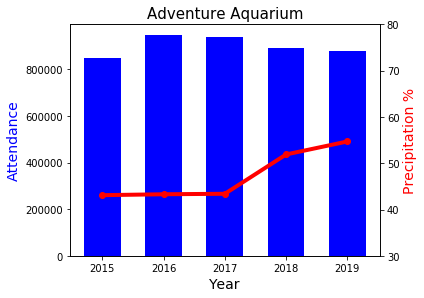

In [107]:
# Creating plot for Adventure Aquarium, using two different scales (different y-axis) and sharing x-axis 
fig,ax = plt.subplots()
t = [2015, 2016, 2017, 2018, 2019]

# Computing y-variable axis and x-axis
ax.bar(t, Attendance_aa["Total Attendance"], width=0.6, color="blue")
ax.set_xlabel("Year", color="black", fontsize=14)
ax.set_ylabel("Attendance",color="blue",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(t, final_b_aa.perc_precip, color="red", marker="o",linewidth=4)
ax2.set_ylabel("Precipitation %",color="red",fontsize=14)

# ax.grid(True)
fig.tight_layout()
plt.title("Adventure Aquarium", fontsize= 15)
ax2.set_ylim(30,80)
plt.show()
#save the plot as a file
fig.savefig('Adventure Aquarium.png',
            format='png',
            dpi=200,
            bbox_inches='tight')

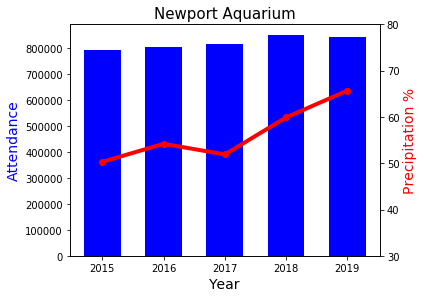

In [99]:
# Creating plot for each park, using two different scales (different y-axis) and sharing x-axis 
fig,axn = plt.subplots()
t = [2015, 2016, 2017, 2018, 2019]

# Computing y-variable axis
axn.bar(t, Attendance_naq["Total Attendance"], width=0.6, color="blue")
axn.set_xlabel("Year", color="black", fontsize=14)
axn.set_ylabel("Attendance",color="blue",fontsize=14)

# twin object for two different y-axis on the sample plot
axn2=axn.twinx()
axn2.plot(t, final_b_naq.perc_precip, color="red", marker="o",linewidth=4)
axn2.set_ylabel("Precipitation %",color="red",fontsize=14)

# ax.grid(True)
fig.tight_layout()
plt.title("Newport Aquarium", fontsize= 15)
axn2.set_ylim(40,80)
plt.show()
#save the plot as a file
fig.savefig('Newport Aquarium.png',
            format='png',
            dpi=200,
            bbox_inches='tight')

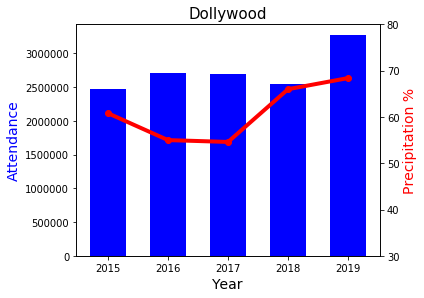

In [100]:
# Creating plot for each park, using two different scales (different y-axis) and sharing x-axis
fig,axd = plt.subplots()
t = [2015, 2016, 2017, 2018, 2019]

# Computing y-variable axis and x-axis
axd.bar(t, Attendance_dw["Total Attendance"], width=0.6, color="blue")
axd.set_xlabel("Year", color="black", fontsize=14)
axd.set_ylabel("Attendance",color="blue",fontsize=14)

# twin object for two different y-axis on the sample plot
axd2=axd.twinx()
axd2.plot(t, final_b_dw.perc_precip, color="red", marker="o",linewidth=4)
axd2.set_ylabel("Precipitation %",color="red",fontsize=14)

# ax.grid(True)
fig.tight_layout()
plt.title("Dollywood", fontsize= 15)
axd2.set_ylim(40,80)
plt.show()
#save the plot as a file
fig.savefig('Dollywood.png',
            format='png',
            dpi=200,
            bbox_inches='tight')

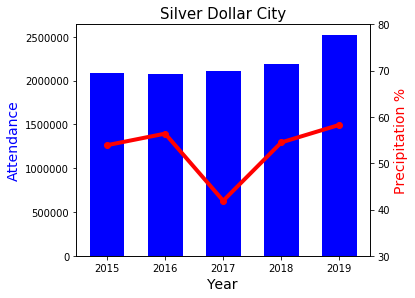

In [101]:
# Creating plot for each park, using two different scales (different y-axis) and sharing x-axis
fig,axs = plt.subplots()
t = [2015, 2016, 2017, 2018, 2019]

# Computing y-variable axis and x-axis
axs.bar(t, Attendance_sd["Total Attendance"], width=0.6, color="blue")
axs.set_xlabel("Year", color="black", fontsize=14)
axs.set_ylabel("Attendance",color="blue",fontsize=14)

# twin object for two different y-axis on the sample plot
axs2=axs.twinx()
axs2.plot(t, final_b_sd.perc_precip, color="red", marker="o",linewidth=4)
axs2.set_ylabel("Precipitation %",color="red",fontsize=14)

# ax.grid(True)
fig.tight_layout()
plt.title("Silver Dollar City", fontsize= 15)
axs2.set_ylim(40,80)
plt.show()
#save the plot as a file
fig.savefig('Silver Dollar City.png',
            format='png',
            dpi=200,
            bbox_inches='tight')

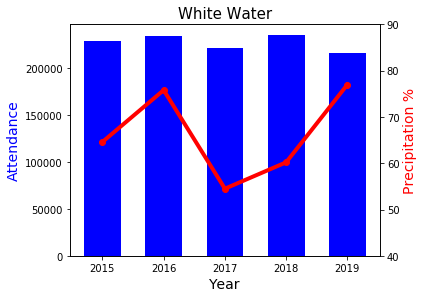

In [102]:
# Creating plot for each park, using two different scales (different y-axis) and sharing x-axis
fig,axw = plt.subplots()
t = [2015, 2016, 2017, 2018, 2019]

# Computing y-variable axis and x-axis
axw.bar(t, Attendance_ww["Total Attendance"], width=0.6, color="blue")
axw.set_xlabel("Year", color="black", fontsize=14)
axw.set_ylabel("Attendance",color="blue",fontsize=14)

# twin object for two different y-axis on the sample plot
axw2=axw.twinx()
axw2.plot(t, final_b_ww.perc_precip, color="red", marker="o",linewidth=4)
axw2.set_ylabel("Precipitation %",color="red",fontsize=14)

# ax.grid(True)
fig.tight_layout()
plt.title("White Water", fontsize= 15)
axw2.set_ylim(40,90)
plt.show()
#save the plot as a file
fig.savefig('White Water.png',
             format='png',
             dpi=200,
             bbox_inches='tight')

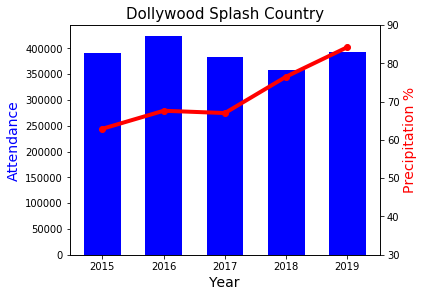

In [108]:
# Creating plot for each park, using two different scales (different y-axis) and sharing x-axis
fig,axds = plt.subplots()
t = [2015, 2016, 2017, 2018, 2019]

# Computing y-variable axis and x-axis
axds.set_xlabel("Year", color="black", fontsize=14)
axds.set_ylabel("Attendance",color="blue",fontsize=14)

# twin object for two different y-axis on the sample plot
axds2=axds.twinx()
axds2.plot(t, final_b_ds.perc_precip, color="red", marker="o",linewidth=4)
axds2.set_ylabel("Precipitation %",color="red",fontsize=14)

# ax.grid(True)
fig.tight_layout()
plt.title("Dollywood Splash Country", fontsize= 15)
axds2.set_ylim(30,90)
plt.show()
#save the plot as a file
fig.savefig('Dollywood Splash Country.png',
             format='png',
             dpi=200,
             bbox_inches='tight')